In [79]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import warnings
warnings.filterwarnings('ignore')

import os 

os.environ['tf_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


In [80]:
df = pd.read_csv('data.csv')

In [81]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [82]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [83]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [84]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [85]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [86]:
df.size

18777

In [87]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [88]:
df.isnull().sum().sum()

569

In [89]:
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [90]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [91]:
df.rename(columns={"Unnamed: 32":"Unnamed"},inplace =True)

In [92]:
df['Unnamed'].notnull().sum()

0

In [93]:
df.drop(columns=["Unnamed"],axis = 1,inplace = True)

In [94]:
def check_df(df, head=5):
  print("################# SHAPE #####################")
  print(df.shape)
  print("################# Types #####################")
  print(df.dtypes)
  print("################# Head  #####################")
  print(df.head(head))
  print("################# Tail  #####################")
  print(df.tail(head))
  print("#################  NA   #####################")
  print(df.isnull().sum())
  print("################# Quantiles #################")
  print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

################# SHAPE #####################
(569, 32)
################# Types #####################
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst             

In [95]:
df.isnull().sum().sum()

0

In [96]:
df = df.rename(columns= {"diagnosis":"target"})
df

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [97]:
index = df['target']
index.value_counts()

B    357
M    212
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

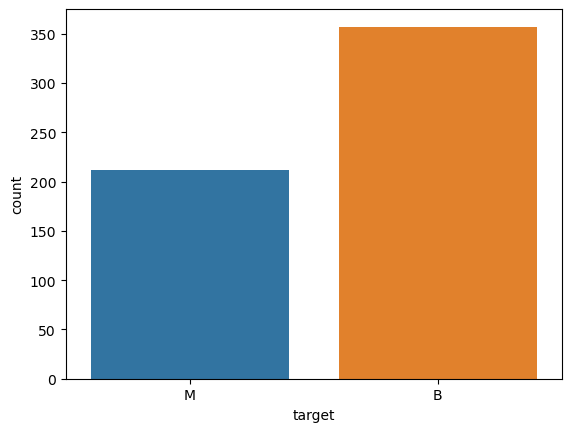

In [98]:
import seaborn as sns
sns.countplot(index)

In [99]:
df["target"] = [1 if i.strip() == "M" else 0 for i in df.target ]
df["target"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [100]:
print(len(df))

569


In [101]:
print(df.shape)

(569, 32)


In [102]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   target                   569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### EDA

In [103]:
corr_matrix = df.corr()

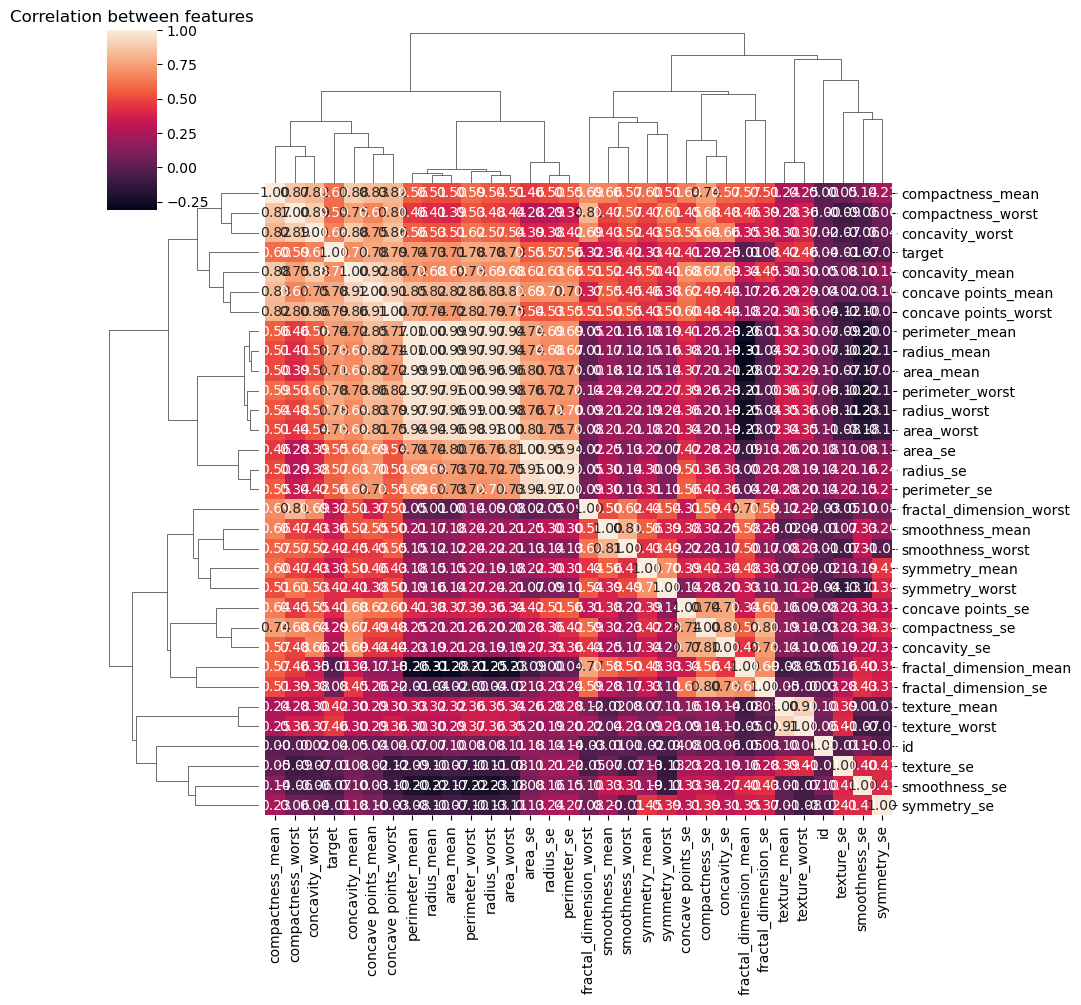

In [104]:
sns.clustermap(corr_matrix,annot=True,fmt =".2f")
plt.title("Correlation between features")
plt.show()

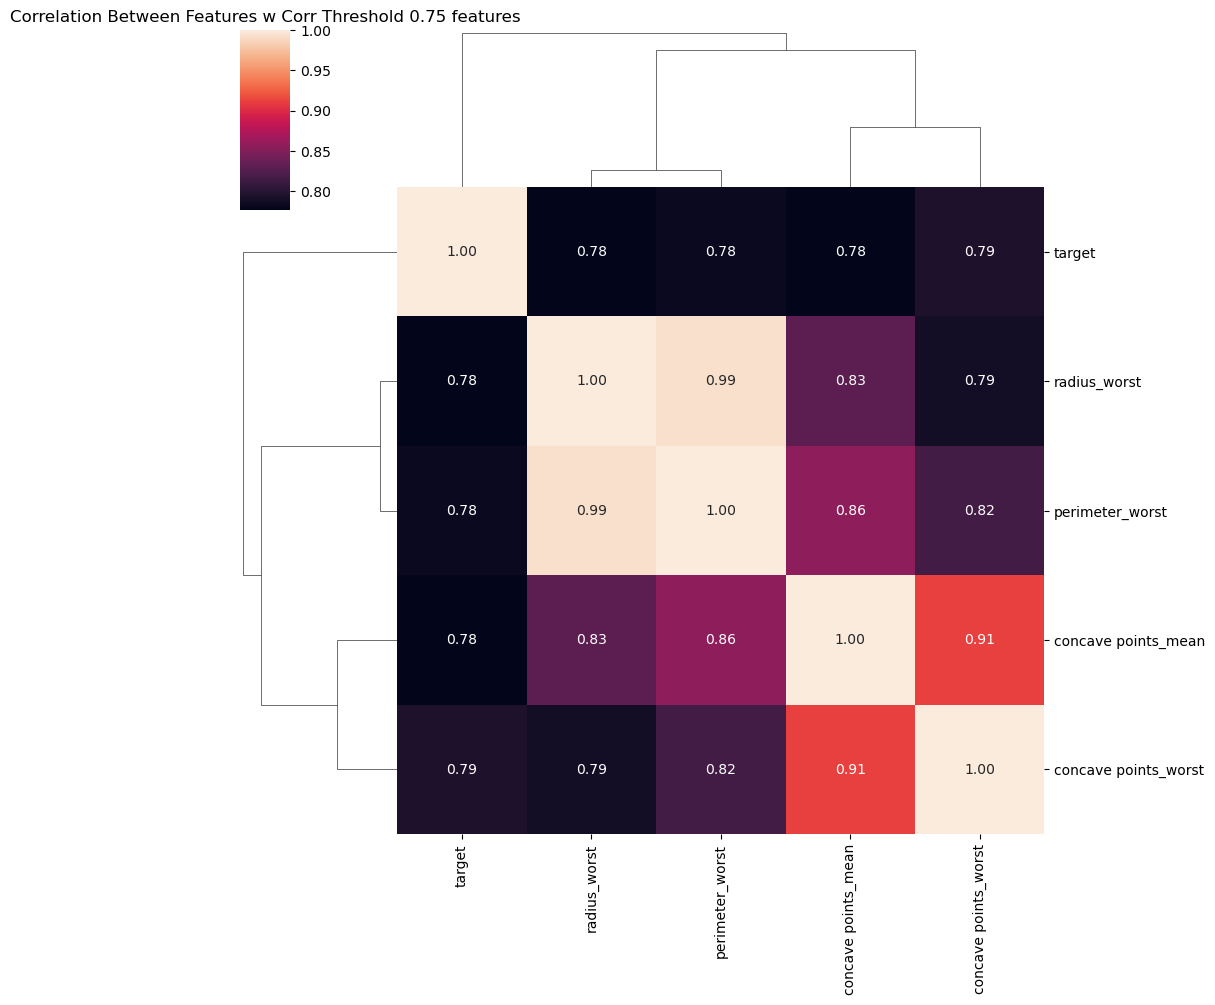

In [105]:
threshold = 0.75
filtre = np.abs(corr_matrix["target"])>threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(),annot=True,fmt =".2f")
plt.title("Correlation Between Features w Corr Threshold 0.75 features")
plt.show()

## standartization

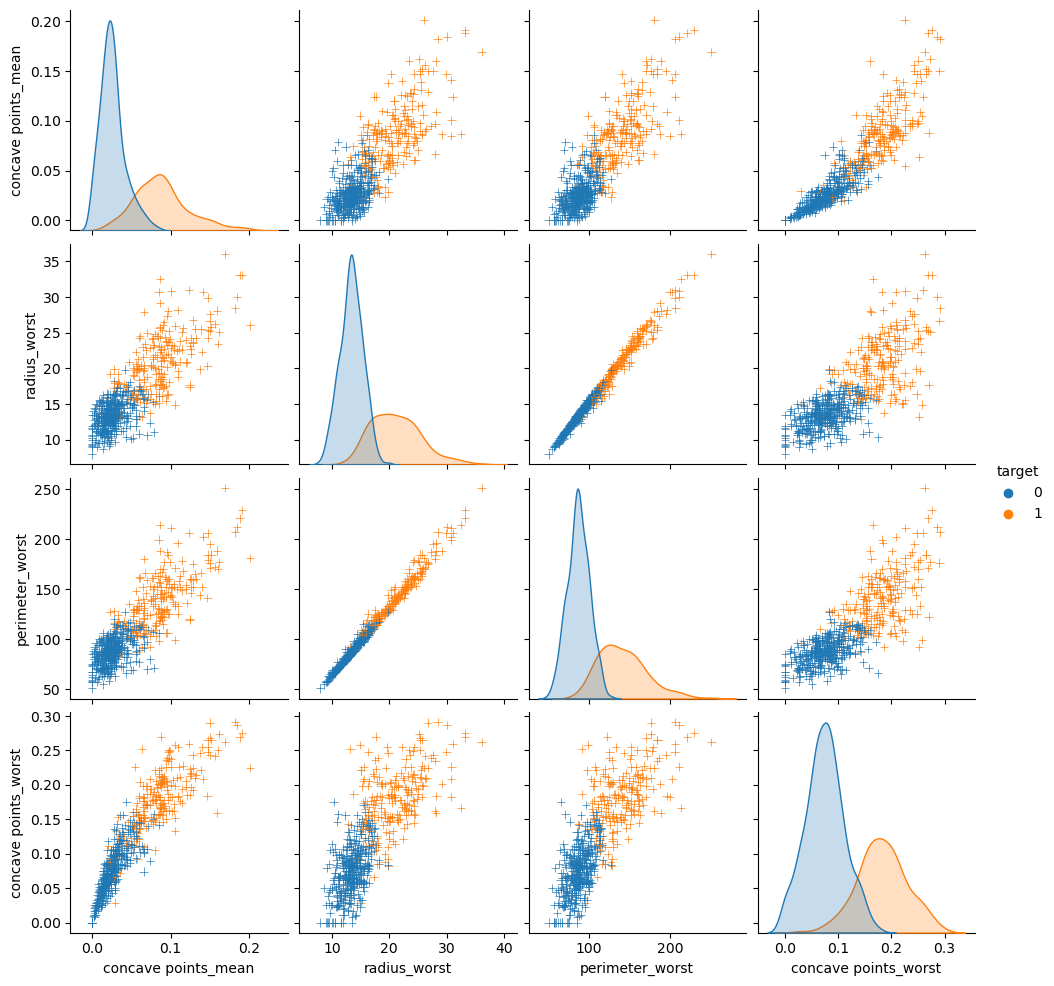

In [106]:
sns.pairplot(df[corr_features],diag_kind="kde",markers="+",hue="target")
plt.show()

In [107]:
y = df.target
x = df.drop(["target"],axis=1)
columns = x.columns.tolist()


In [108]:
from sklearn.neighbors import KNeighborsClassifier , NeighborhoodComponentsAnalysis,LocalOutlierFactor
clf = LocalOutlierFactor()
pred = clf.fit_predict(x)
pred

array([-1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1,  1

In [109]:
y = df["target"].values
x = df.drop(["target"],axis=1).values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [110]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(381, 31) (381,) (188, 31) (188,)


In [171]:
scaler_train = MinMaxScaler(feature_range=(0,1))
x_train = scaler_train.fit_transform(x_train)
scaler_test = MinMaxScaler(feature_range=(0,1))
x_test = scaler_test.fit_transform(x_test)

In [184]:
print(x_train.shape, x_test.shape)

(381, 31) (188, 31)


In [317]:
# Initializing the ANN
ann = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=x_train[0].shape))


# Add the second hidden layer
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
# Add the dropout
ann.add(Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=9, activation='relu'))
ann.add(Dropout(0.2))


# Add the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [318]:
ann.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 12)                384       
                                                                 
 dense_94 (Dense)            (None, 8)                 104       
                                                                 
 dense_95 (Dense)            (None, 4)                 36        
                                                                 
 dropout_31 (Dropout)        (None, 4)                 0         
                                                                 
 dense_96 (Dense)            (None, 9)                 45        
                                                                 
 dropout_32 (Dropout)        (None, 9)                 0         
                                                                 
 dense_97 (Dense)            (None, 1)               

In [319]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [320]:
callbacks = [EarlyStopping(monitor='val_loss', patience=3, verbose=1,mode='min'),
             ModelCheckpoint(filepath='mymodel.h5',moniter='val_loss', mode='min',save_best_only=True, save_weights_only=False, verbose=1)]

In [321]:
history = ann.fit(x_train, y_train, 
                  batch_size = 32,
                  epochs = 50, 
                  callbacks= callbacks,
                  shuffle=False)

Epoch 1/50
12/12 [==============================] - 1s 2ms/step - loss: 0.6741 - accuracy: 0.4856
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.5853
Epoch 3/50
12/12 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.6667
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.7297
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.8031
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.7979
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.8215
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.8294
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.8373
Epoch 10/50
12/12 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.8688
Epoch 11/50
12/12 [

In [322]:
y_pred = ann.predict(x_test)

6/6 [==============================] - 0s 1ms/step


In [323]:
y_pred = (y_pred > 0.5)
pd.DataFrame(list(zip(y_test, y_pred)), columns=['Actual', 'Predicted'])

,Actual,Predicted
0,0,[True]
1,1,[True]
2,1,[True]
3,0,[False]
4,0,[False]
...,...,...
183,1,[True]
184,1,[True]
185,1,[True]
186,0,[True]


In [324]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[92 29]
 [ 0 67]]
0.8457446808510638


In [325]:
df.head()

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


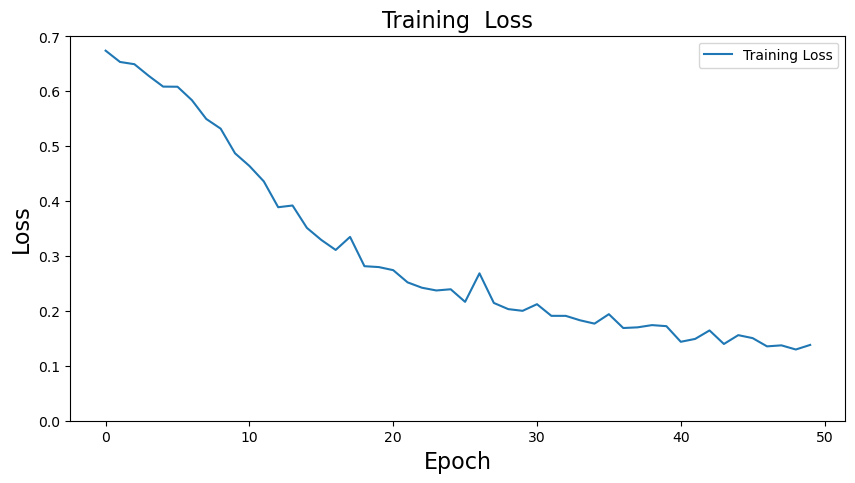

In [326]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training  Loss', fontsize=16)
plt.show()

In [328]:
pred1 = df[3:4]
pred1 = pred1.drop(columns=['target'],axis=1)
pred1

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173


In [329]:
pred1 = pred1.values

In [330]:
pred1

array([[8.4348301e+07, 1.1420000e+01, 2.0380000e+01, 7.7580000e+01,
        3.8610000e+02, 1.4250000e-01, 2.8390000e-01, 2.4140000e-01,
        1.0520000e-01, 2.5970000e-01, 9.7440000e-02, 4.9560000e-01,
        1.1560000e+00, 3.4450000e+00, 2.7230000e+01, 9.1100000e-03,
        7.4580000e-02, 5.6610000e-02, 1.8670000e-02, 5.9630000e-02,
        9.2080000e-03, 1.4910000e+01, 2.6500000e+01, 9.8870000e+01,
        5.6770000e+02, 2.0980000e-01, 8.6630000e-01, 6.8690000e-01,
        2.5750000e-01, 6.6380000e-01, 1.7300000e-01]])

In [331]:
print(ann.predict(sc.transform(pred1)) > 0.5)
## Doğru tahmin

1/1 [==============================] - 0s 19ms/step
[[ True]]


In [332]:
pred2 = df[66:67]
pred2

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
66,859464,0,9.465,21.01,60.11,269.4,0.1044,0.07773,0.02172,0.01504,...,10.41,31.56,67.03,330.7,0.1548,0.1664,0.09412,0.06517,0.2878,0.09211


In [333]:
pred2.drop(columns=['target'],axis=1,inplace=True)

In [334]:
pred2

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
66,859464,9.465,21.01,60.11,269.4,0.1044,0.07773,0.02172,0.01504,0.1717,...,10.41,31.56,67.03,330.7,0.1548,0.1664,0.09412,0.06517,0.2878,0.09211


In [335]:
print(ann.predict(sc.transform(pred2)) > 0.5)

1/1 [==============================] - 0s 15ms/step
[[ True]]


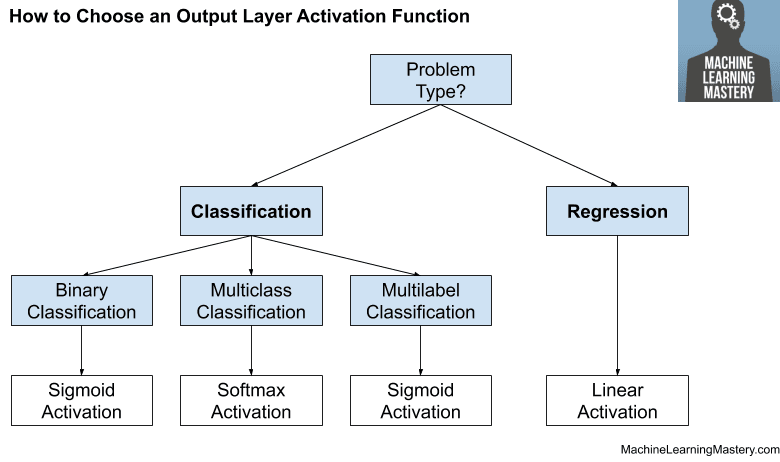

In [451]:
from IPython.display import Image
Image(filename='How-to-Choose-an-Output-Layer-Activation-Function.jpeg',width=800, height=1000)

### Başka aktivasyon fonsiyonları ile denedim

In [444]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(31,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='softmax'))

In [445]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [446]:
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=50, batch_size=20)

Epoch 1/50
20/20 [==============================] - 1s 1ms/step - loss: 0.6729 - accuracy: 0.3806
Epoch 2/50
20/20 [==============================] - 0s 1ms/step - loss: 0.6141 - accuracy: 0.3806
Epoch 3/50
20/20 [==============================] - 0s 1ms/step - loss: 0.5219 - accuracy: 0.3806
Epoch 4/50
20/20 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.3806
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.3806
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.3806
Epoch 7/50
20/20 [==============================] - 0s 1ms/step - loss: 0.2231 - accuracy: 0.3806
Epoch 8/50
20/20 [==============================] - 0s 1ms/step - loss: 0.1953 - accuracy: 0.3806
Epoch 9/50
20/20 [==============================] - 0s 1ms/step - loss: 0.1843 - accuracy: 0.3806
Epoch 10/50
20/20 [==============================] - 0s 1ms/step - loss: 0.1744 - accuracy: 0.3806
Epoch 11/50
20/20 [

## Accuracy çok düşük softmax'de çünkü çok sınıflalarda kullanılır

In [458]:
# define the keras model
model2 = Sequential()
model2.add(Dense(12, input_shape=(31,), activation='relu'))

model2.add(Dense(16, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))

model2.add(Dense(1, activation='sigmoid'))

In [461]:
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [462]:
history = model2.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
6/6 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6063
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6194
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6194
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6194
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6194
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.6194
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.6194
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6194
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6194
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accura

In [469]:
y_pred = model.predict(x_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

6/6 [==============================] - 0s 1ms/step


In [470]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 100.0


In [475]:
history = model2.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - accuracy: 0.6194 - val_loss: 0.0000e+00 - val_accuracy: 0.6436
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.6194 - val_loss: 0.0000e+00 - val_accuracy: 0.6436
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.6194 - val_loss: 0.0000e+00 - val_accuracy: 0.6436
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.6194 - val_loss: 0.0000e+00 - val_accuracy: 0.6436
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.6194 - val_loss: 0.0000e+00 - val_accuracy: 0.6436
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.6194 - val_loss: 0.0000e+00 - val_accuracy: 0.6436
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.6194 - val_loss: 0.00